In [1]:
import json

with open('/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-06/12-05-56/results.json') as f:
    results = json.load(f)

top_k = int(results["top_k"])
results = results["results"]

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(3, top_k)
    fig.set_size_inches(10, 4)
    labels = ["lrg", "mdm", "sml"]
    for i, ax in enumerate(axes.flatten()):
        label = labels[i // top_k]
        image = plt.imread(features[label][i % top_k][0])
        label = float(features[label][i % top_k][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none') 
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    if pair["feature"]:
        print("\nTop-n images with largest absolute values of logits:")
        plot_instances(pair["feature"])
    print(120 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. green: 0.1073
	2. lime: 0.0776
	3. with: 0.0652
	4. outline: 0.0597
	5. angle: 0.0514
	6. quadratic: 0.0437
	7. corner: 0.0433
	8. triangular: 0.0383
	9. four: 0.0270
	10. up: 0.0268
	11. shape: 0.0268
	12. white: 0.0263
	13. unrotate: 0.0257
	14. figure: 0.0244
	15. cyan: 0.0207
	16. no: 0.0149
	17. right: 0.0143
	18. blank: 0.0088
	19. this: 0.0058
	20. bottom: 0.0042
	21. locate: 0.0036
	22. static: 0.0015
	23. in: 0.0011
	24. azure: 0.0010
	25. have: 0.0000
	26. unturn: 0.0000
	27. form: 0.0000
	28. picture: 0.0000
	29. circular: 0.0000
	30. blue: 0.0000
	31. round: 0.0000
	32. crimson: 0.0000
	33. scarlet: 0.0000
	34. red: 0.0000
	35. olive: 0.0000
	36. that: 0.0000
	37. <pad>: 0.0000
	38. transparent: 0.0000
	39. rotate: 0.0000
	40. left: 0.0000
	41. fix: 0.0000
	42. turn: 0.0000
	43. position: 0.0000
	44. is: 0.0000
	45. solid: 0.0000
	46. background: 0.0000
	47. shade: 0.0000
	48. photo: 0.0000
	49. canvas: 0.0000
	50

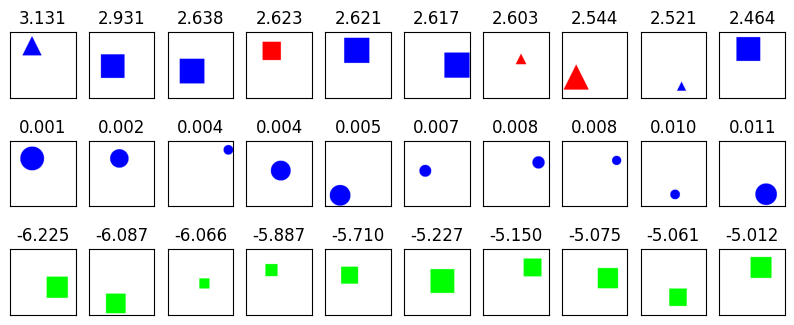

------------------------------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. background: 0.1531
	2. that: 0.1476
	3. photo: 0.1437
	4. canvas: 0.1348
	5. scarlet: 0.1327
	6. the: 0.1299
	7. three: 0.1286
	8. shade: 0.1258
	9. shape: 0.1214
	10. unturn: 0.1196
	11. crimson: 0.1075
	12. red: 0.1036
	13. static: 0.0994
	14. picture: 0.0980
	15. transparent: 0.0978
	16. have: 0.0903
	17. this: 0.0896
	18. green: 0.0787
	19. solid: 0.0763
	20. quadratic: 0.0739
	21. rotate: 0.0739
	22. lime: 0.0712
	23. form: 0.0658
	24. four: 0.0642
	25. with: 0.0596
	26. in: 0.0495
	27. image: 0.0475
	28. right: 0.0437
	29. left: 0.0433
	30. turn: 0.0431
	31. angle: 0.0410
	32. round: 0.0402
	33. white: 0.0389
	34. outline: 0.0383
	35. bottom: 0.0377
	36. cyan: 0.0368
	37. position: 0.0360
	38. corner: 0.0317
	39. azure: 0.0268
	40. unrotate: 0.0258
	41. circular: 0.0224
	42. locate: 0.0217
	43. up: 0.

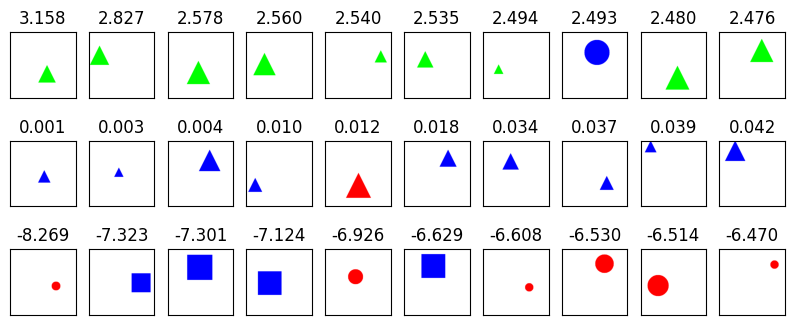

------------------------------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. blue: 0.4158
	2. azure: 0.1407
	3. cyan: 0.0979
	4. no: 0.0345
	5. red: 0.0000
	6. crimson: 0.0000
	7. lime: 0.0000
	8. scarlet: 0.0000
	9. olive: 0.0000
	10. green: 0.0000
	11. unrotate: 0.0000
	12. circular: 0.0000
	13. quadratic: 0.0000
	14. bottom: 0.0000
	15. image: 0.0000
	16. picture: 0.0000
	17. outline: 0.0000
	18. round: 0.0000
	19. turn: 0.0000
	20. color: 0.0000
	21. is: 0.0000
	22. shape: 0.0000
	23. this: 0.0000
	24. right: 0.0000
	25. <pad>: 0.0000
	26. unturn: 0.0000
	27. three: 0.0000
	28. background: 0.0000
	29. position: 0.0000
	30. with: 0.0000
	31. corner: 0.0000
	32. that: 0.0000
	33. form: 0.0000
	34. blank: 0.0000
	35. white: 0.0000
	36. fix: 0.0000
	37. four: 0.0000
	38. transparent: 0.0000
	39. in: 0.0000
	40. locate: 0.0000
	41. canvas: 0.0000
	42. left: 0.0000
	43. figure: 0.0000

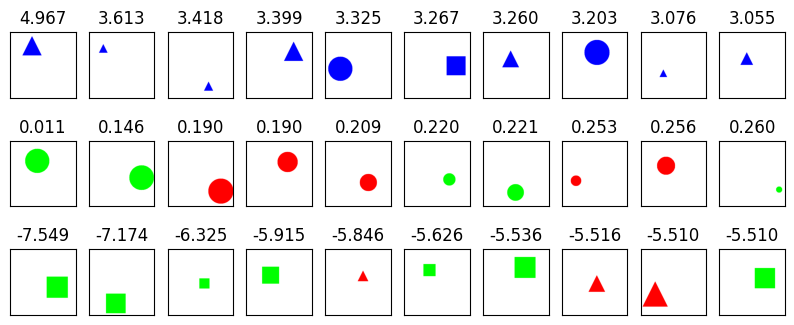

------------------------------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. triangular: 0.1546
	2. four: 0.1034
	3. quadratic: 0.0632
	4. azure: 0.0484
	5. with: 0.0262
	6. corner: 0.0195
	7. angle: 0.0158
	8. no: 0.0144
	9. blue: 0.0058
	10. in: 0.0042
	11. cyan: 0.0038
	12. figure: 0.0037
	13. unrotate: 0.0024
	14. static: 0.0017
	15. rotate: 0.0010
	16. white: 0.0001
	17. turn: 0.0001
	18. outline: 0.0000
	19. round: 0.0000
	20. circular: 0.0000
	21. three: 0.0000
	22. have: 0.0000
	23. red: 0.0000
	24. scarlet: 0.0000
	25. lime: 0.0000
	26. green: 0.0000
	27. fix: 0.0000
	28. crimson: 0.0000
	29. <pad>: 0.0000
	30. position: 0.0000
	31. solid: 0.0000
	32. olive: 0.0000
	33. this: 0.0000
	34. shape: 0.0000
	35. canvas: 0.0000
	36. picture: 0.0000
	37. left: 0.0000
	38. blank: 0.0000
	39. bottom: 0.0000
	40. up: 0.0000
	41. right: 0.0000
	42. form: 0.0000
	43. that: 0.0000
	44. s

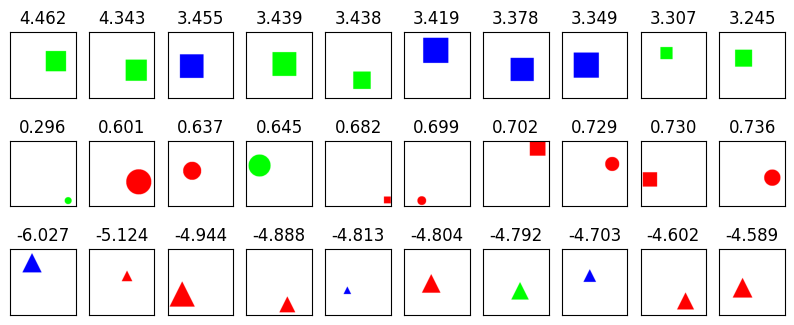

------------------------------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. rotate: 0.2956
	2. turn: 0.2384
	3. four: 0.2281
	4. quadratic: 0.2248
	5. have: 0.2119
	6. azure: 0.1678
	7. three: 0.1454
	8. in: 0.1399
	9. olive: 0.1221
	10. canvas: 0.1137
	11. static: 0.1032
	12. with: 0.0788
	13. the: 0.0784
	14. cyan: 0.0401
	15. green: 0.0375
	16. unturn: 0.0365
	17. scarlet: 0.0277
	18. blue: 0.0275
	19. outline: 0.0230
	20. picture: 0.0202
	21. unrotate: 0.0137
	22. angle: 0.0130
	23. corner: 0.0062
	24. no: 0.0013
	25. triangular: 0.0006
	26. form: 0.0004
	27. circular: 0.0000
	28. fix: 0.0000
	29. round: 0.0000
	30. is: 0.0000
	31. position: 0.0000
	32. lime: 0.0000
	33. <pad>: 0.0000
	34. background: 0.0000
	35. red: 0.0000
	36. crimson: 0.0000
	37. that: 0.0000
	38. shape: 0.0000
	39. this: 0.0000
	40. white: 0.0000
	41. image: 0.0000
	42. color: 0.0000
	43. right: 0.0000
	44

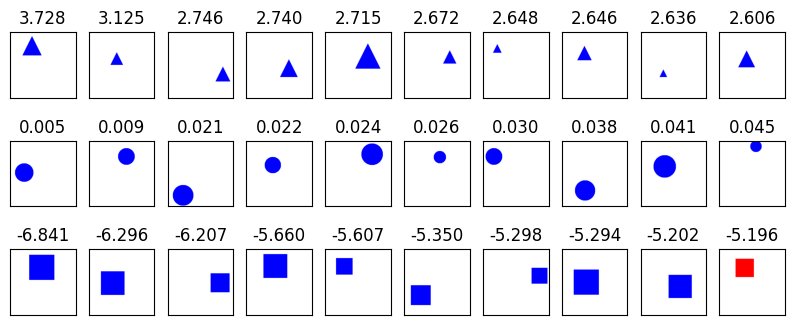

------------------------------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. green: 0.2091
	2. white: 0.1939
	3. lime: 0.1799
	4. that: 0.1683
	5. this: 0.1493
	6. the: 0.1233
	7. canvas: 0.1096
	8. static: 0.0890
	9. background: 0.0690
	10. with: 0.0594
	11. outline: 0.0509
	12. shape: 0.0461
	13. picture: 0.0424
	14. unturn: 0.0415
	15. three: 0.0363
	16. locate: 0.0283
	17. right: 0.0269
	18. angle: 0.0266
	19. left: 0.0224
	20. bottom: 0.0210
	21. corner: 0.0198
	22. transparent: 0.0194
	23. figure: 0.0176
	24. circular: 0.0137
	25. four: 0.0133
	26. in: 0.0133
	27. form: 0.0127
	28. scarlet: 0.0078
	29. position: 0.0076
	30. have: 0.0060
	31. up: 0.0037
	32. blank: 0.0035
	33. azure: 0.0032
	34. shade: 0.0028
	35. photo: 0.0016
	36. solid: 0.0014
	37. rotate: 0.0007
	38. unrotate: 0.0005
	39. image: 0.0005
	40. cyan: 0.0002
	41. quadratic: 0.0000
	42. triangular: 0.0000
	43. bl

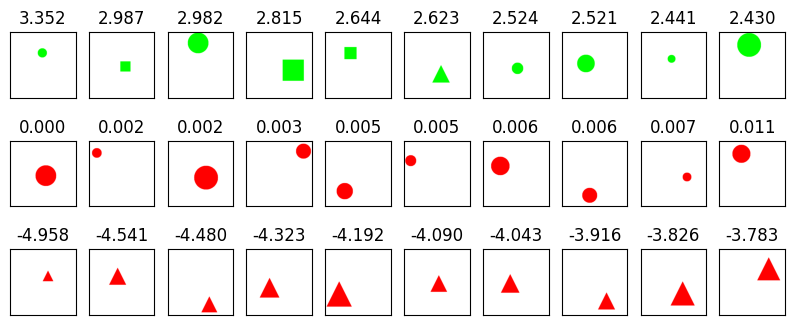

------------------------------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. triangular: 0.3041
	2. quadratic: 0.1847
	3. corner: 0.1541
	4. angle: 0.1489
	5. no: 0.1217
	6. outline: 0.1041
	7. with: 0.0858
	8. olive: 0.0809
	9. is: 0.0799
	10. right: 0.0794
	11. unrotate: 0.0754
	12. color: 0.0752
	13. figure: 0.0689
	14. white: 0.0654
	15. bottom: 0.0504
	16. blank: 0.0500
	17. in: 0.0499
	18. up: 0.0401
	19. static: 0.0400
	20. four: 0.0391
	21. shape: 0.0379
	22. unturn: 0.0320
	23. turn: 0.0291
	24. fix: 0.0214
	25. locate: 0.0141
	26. circular: 0.0112
	27. picture: 0.0097
	28. rotate: 0.0088
	29. position: 0.0070
	30. blue: 0.0059
	31. left: 0.0031
	32. cyan: 0.0020
	33. crimson: 0.0017
	34. green: 0.0006
	35. canvas: 0.0006
	36. form: 0.0003
	37. azure: 0.0002
	38. background: 0.0000
	39. round: 0.0000
	40. have: 0.0000
	41. <pad>: 0.0000
	42. transparent: 0.0000
	43. that: 0

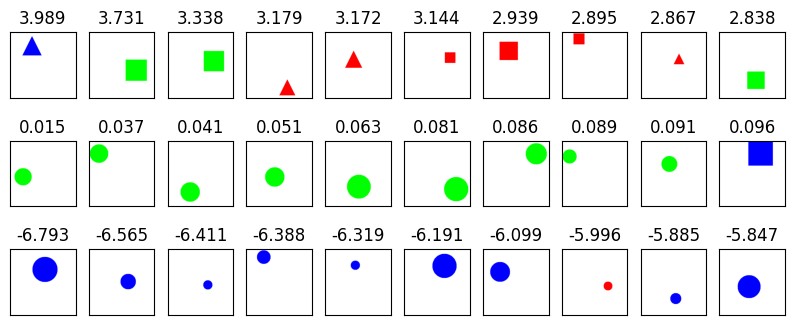

------------------------------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. azure: 0.2928
	2. cyan: 0.2809
	3. blue: 0.2627
	4. no: 0.1120
	5. turn: 0.0714
	6. have: 0.0686
	7. outline: 0.0443
	8. with: 0.0209
	9. green: 0.0152
	10. rotate: 0.0138
	11. olive: 0.0131
	12. in: 0.0043
	13. unturn: 0.0035
	14. four: 0.0015
	15. this: 0.0001
	16. unrotate: 0.0000
	17. red: 0.0000
	18. crimson: 0.0000
	19. lime: 0.0000
	20. scarlet: 0.0000
	21. circular: 0.0000
	22. quadratic: 0.0000
	23. is: 0.0000
	24. triangular: 0.0000
	25. corner: 0.0000
	26. image: 0.0000
	27. bottom: 0.0000
	28. fix: 0.0000
	29. picture: 0.0000
	30. position: 0.0000
	31. <pad>: 0.0000
	32. three: 0.0000
	33. static: 0.0000
	34. right: 0.0000
	35. color: 0.0000
	36. background: 0.0000
	37. white: 0.0000
	38. shape: 0.0000
	39. transparent: 0.0000
	40. that: 0.0000
	41. form: 0.0000
	42. the: 0.0000
	43. figure: 0.0

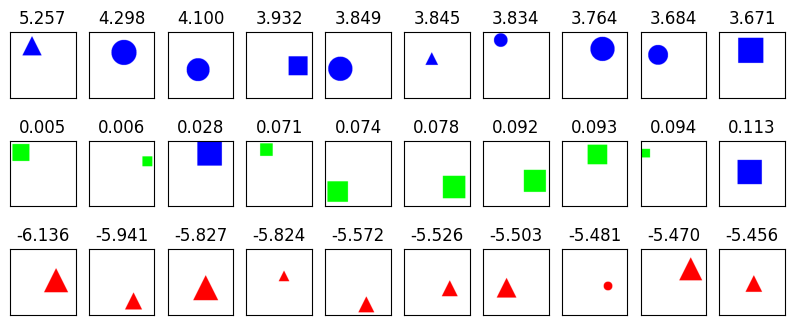

------------------------------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. fix: 0.1362
	2. is: 0.1321
	3. color: 0.1291
	4. position: 0.1227
	5. round: 0.1186
	6. image: 0.1173
	7. left: 0.1087
	8. circular: 0.1080
	9. locate: 0.1015
	10. olive: 0.0998
	11. solid: 0.0993
	12. bottom: 0.0988
	13. right: 0.0973
	14. no: 0.0943
	15. outline: 0.0778
	16. transparent: 0.0750
	17. unrotate: 0.0746
	18. red: 0.0724
	19. in: 0.0712
	20. crimson: 0.0700
	21. blank: 0.0694
	22. picture: 0.0683
	23. figure: 0.0645
	24. angle: 0.0643
	25. white: 0.0636
	26. corner: 0.0616
	27. form: 0.0576
	28. this: 0.0555
	29. turn: 0.0536
	30. shade: 0.0533
	31. up: 0.0529
	32. photo: 0.0449
	33. triangular: 0.0447
	34. scarlet: 0.0422
	35. unturn: 0.0411
	36. with: 0.0396
	37. static: 0.0343
	38. shape: 0.0327
	39. background: 0.0284
	40. lime: 0.0278
	41. blue: 0.0252
	42. rotate: 0.0240
	43. have: 0.021

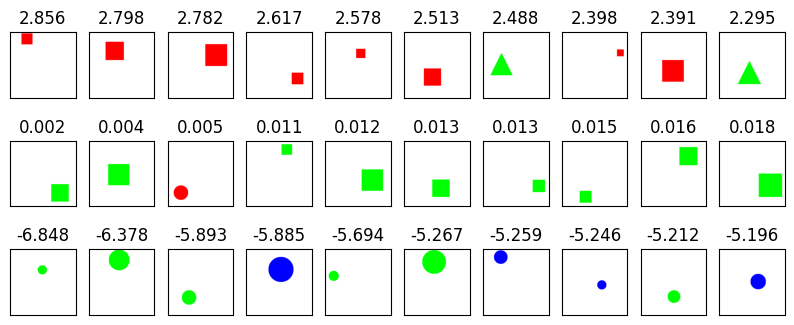

------------------------------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. azure: 0.2376
	2. blue: 0.1636
	3. four: 0.1524
	4. cyan: 0.1234
	5. quadratic: 0.1147
	6. have: 0.0451
	7. turn: 0.0181
	8. green: 0.0121
	9. with: 0.0049
	10. rotate: 0.0006
	11. olive: 0.0005
	12. circular: 0.0000
	13. triangular: 0.0000
	14. red: 0.0000
	15. crimson: 0.0000
	16. scarlet: 0.0000
	17. lime: 0.0000
	18. round: 0.0000
	19. three: 0.0000
	20. outline: 0.0000
	21. unrotate: 0.0000
	22. is: 0.0000
	23. no: 0.0000
	24. picture: 0.0000
	25. <pad>: 0.0000
	26. bottom: 0.0000
	27. white: 0.0000
	28. fix: 0.0000
	29. right: 0.0000
	30. image: 0.0000
	31. background: 0.0000
	32. color: 0.0000
	33. position: 0.0000
	34. unturn: 0.0000
	35. static: 0.0000
	36. this: 0.0000
	37. shape: 0.0000
	38. that: 0.0000
	39. form: 0.0000
	40. the: 0.0000
	41. figure: 0.0000
	42. shade: 0.0000
	43. locate: 0.000

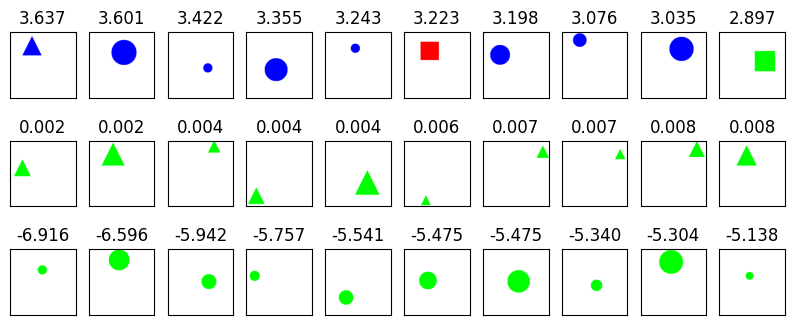

------------------------------------------------------------------------------------------------------------------------
Concept #11

Top-k tokens w.r.t. average attention score:
	1. up: 0.2894
	2. figure: 0.2465
	3. blank: 0.2391
	4. form: 0.1753
	5. unrotate: 0.1398
	6. cyan: 0.1166
	7. locate: 0.0979
	8. lime: 0.0922
	9. circular: 0.0802
	10. angle: 0.0770
	11. triangular: 0.0706
	12. corner: 0.0679
	13. green: 0.0540
	14. bottom: 0.0513
	15. no: 0.0492
	16. shape: 0.0483
	17. left: 0.0384
	18. position: 0.0348
	19. fix: 0.0174
	20. the: 0.0161
	21. white: 0.0160
	22. right: 0.0147
	23. with: 0.0137
	24. color: 0.0098
	25. four: 0.0092
	26. azure: 0.0052
	27. shade: 0.0051
	28. picture: 0.0044
	29. outline: 0.0041
	30. this: 0.0034
	31. transparent: 0.0033
	32. in: 0.0026
	33. blue: 0.0003
	34. solid: 0.0001
	35. scarlet: 0.0000
	36. static: 0.0000
	37. quadratic: 0.0000
	38. olive: 0.0000
	39. round: 0.0000
	40. red: 0.0000
	41. crimson: 0.0000
	42. unturn: 0.0000
	43. is: 0.0000
	

IndexError: list index out of range

In [5]:
for i in range(51):
    visualize_concept(i)